In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

In [2]:
x = np.linspace(-5, 5, 10000)

In [3]:
x = np.random.choice(x, size = 1000)

In [4]:
y = 3 * x + 5

In [5]:
# Random var the mean of which is 0
y_noise = np.random.uniform(5, 10, size = len(x))

In [6]:
y_noise.mean()

np.float64(7.564652913236856)

If the mean of the noise is something, then it will be added to the intercept so that is why we supposed the noise is 0.

In [7]:
# Gaussian distribution with mean = 0 and standard deviation = 1
y_noise = np.random.normal(0, 1, size = len(x))

In [8]:
# This noise is acceptable let's say
y_noise.mean()

np.float64(-0.022374494601016863)

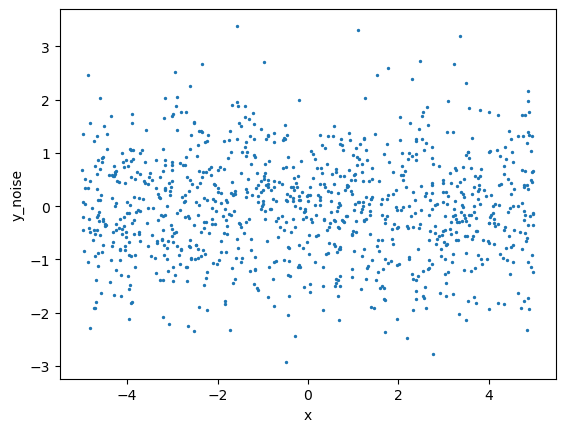

In [9]:
plt.scatter(x, y_noise, s = 2)
plt.xlabel("x")
plt.ylabel("y_noise")
plt.show()

The average is 0

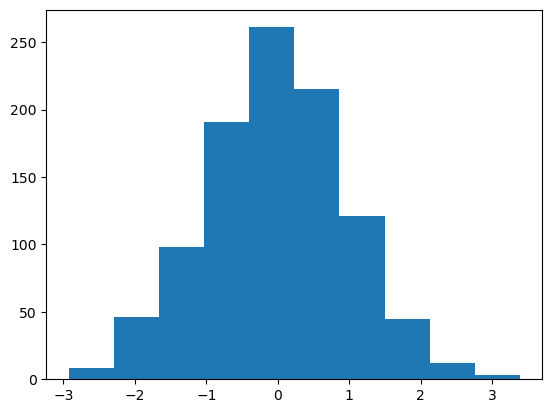

In [10]:
plt.hist(y_noise)
plt.show()

In [11]:
y_noise = np.random.normal(0, 0.5, size = len(x))

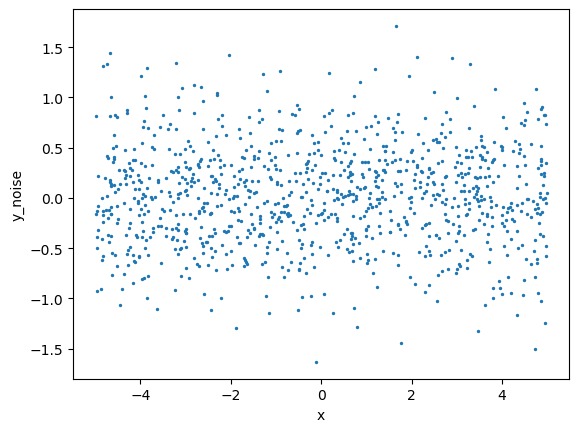

In [12]:
plt.scatter(x, y_noise, s = 2)
plt.xlabel("x")
plt.ylabel("y_noise")
plt.show()

The interval is different.

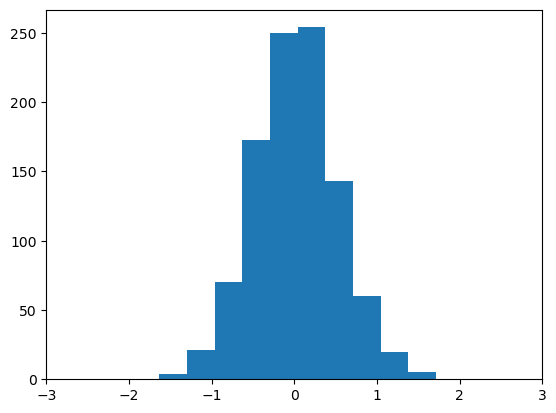

In [13]:
plt.hist(y_noise)
plt.xlim(-3, 3)
plt.show()

In [14]:
# Thus, the noise depends on the data
y_noise_dependent = np.random.normal(0, 0.5, size = len(x)) * x

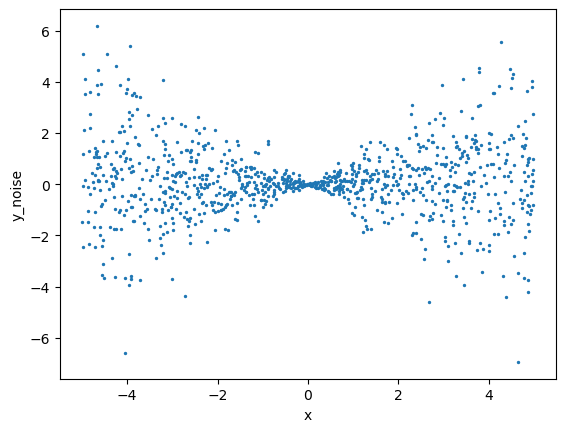

In [15]:
plt.scatter(x, y_noise_dependent, s = 2)
plt.xlabel("x")
plt.ylabel("y_noise")
plt.show()

This is a very bad case and this behaviour is not random and is not noise.
heteroskedasticity

In [16]:
y += y_noise

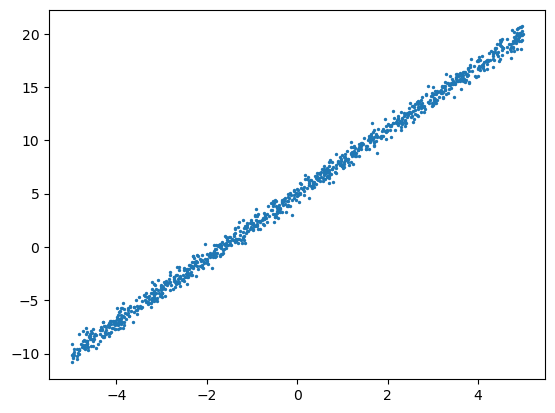

In [17]:
plt.scatter(x, y, s = 2)
plt.show()

In [18]:
y_noise = np.random.normal(0, 2, size = len(x))

In [19]:
y += y_noise

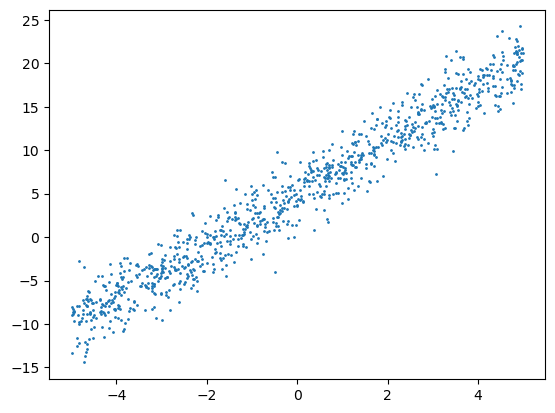

In [20]:
plt.scatter(x, y, s = 1)
plt.show()

In [21]:
model = LinearRegression()

In [22]:
# sklearn does not know if these are 1000 records for one variable 
# or 1000 features for one variable
x.shape

(1000,)

In [23]:
x = x.reshape(-1, 1)

In [24]:
model.fit(x, y)

LinearRegression()

In [25]:
model.coef_

array([3.04374062])

In [26]:
model.intercept_

np.float64(5.048247300587099)

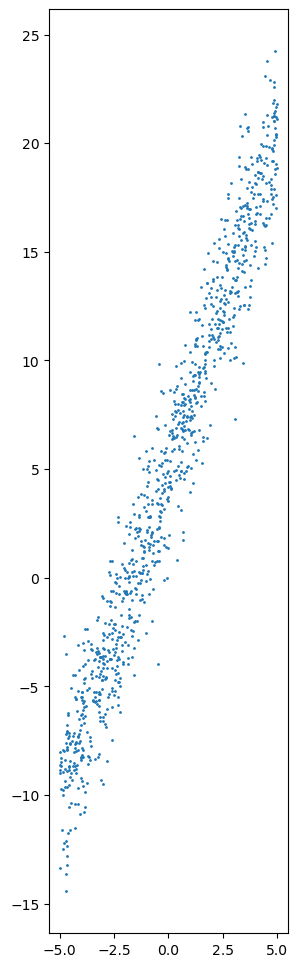

In [27]:
plt.figure(figsize=(6, 12))
plt.scatter(x, y, s = 1)
plt.gca().set_aspect("equal")
plt.show()

In [28]:
X = pd.Series(["red", "green", "blue"])

In [29]:
y = [1, 2, 3]

The model should guess that red is 1 and so on.

In [30]:
X = pd.get_dummies(X).astype(int)

In [31]:
X

,blue,green,red
0,0,0,1
1,0,1,0
2,1,0,0


The model will have three variables and 1 intercept meaning 4 things which can change. This is a big freedom for the model.

In [32]:
model1 = LinearRegression()

In [33]:
model1.fit(X, y)

LinearRegression()

In [34]:
list(zip(X.columns, model1.coef_))

[('blue', np.float64(0.9999999999999998)),
 ('green', np.float64(1.750349682851053e-17)),
 ('red', np.float64(-0.9999999999999992))]

In [35]:
model1.intercept_

np.float64(1.9999999999999998)

In [36]:
1 + 2
# blue_coef + intercept = corresponding_number_to_blue 

3

In [37]:
model2 = LinearRegression(fit_intercept =  False) # reduce the freedom

In [38]:
model2.fit(X, y)

LinearRegression(fit_intercept=False)

In [39]:
list(zip(X.columns, model2.coef_))

[('blue', np.float64(3.0)),
 ('green', np.float64(2.0)),
 ('red', np.float64(1.0))]

In [40]:
model2.intercept_

0.0

Parts of the weights of the model are being allocated to the intercept and change it. That is why, it is not good to have dependent columns.

In [41]:
X_clean = X.drop(columns = "blue")

In [42]:
model3 = LinearRegression()

Now the model has three degrees of freedom and three records to describe them.

In [43]:
model3.fit(X_clean, y)

LinearRegression()

In [44]:
 # the negative numebr can be explained by covariate and contravariate arguments
list(zip(X_clean.columns, model3.coef_))

[('green', np.float64(-0.9999999999999992)),
 ('red', np.float64(-1.9999999999999993))]

In [45]:
# The intercept == blue_coef; in the beginning it has been 0
# A lot of things can become messed up with more data; now we have as much data as we need
# The intercept will take the degree of freedom that misses and will equal the coeficient
model3.intercept_

np.float64(2.9999999999999996)

It is difficult to have as many records as variables. Moreover, it is hard to have only one categorical variable. Intercept is some kind of average that describes the data but it does not give full information when we have more data.

In [46]:
# Now more data will be added

In [47]:
X_long = pd.Series(np.random.choice(["red", "green", "blue"], size = 1000))

In [48]:
y_long = X_long.replace({
    "red": 1,
    "green": 10, 
    "blue": 100
})

C:\Users\aneli\AppData\Local\Temp\ipykernel_4456\675051716.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_long = X_long.replace({


In [49]:
y_long += np.random.normal(0, 1, size = len(y_long))

In [50]:
y_long

0      100.379835
1       11.729879
2       -0.182078
3        9.573046
4       10.042880
          ...    
995     99.271937
996     10.378688
997      9.480927
998      1.573670
999      2.283177
Length: 1000, dtype: float64

In [51]:
X_long = pd.get_dummies(X_long)

In [52]:
X_long

,blue,green,red
0,True,False,False
1,False,True,False
2,False,False,True
3,False,True,False
4,False,True,False
...,...,...,...
995,True,False,False
996,False,True,False
997,False,True,False
998,False,False,True


In [53]:
model4 = LinearRegression()

In [54]:
model4.fit(X_long, y_long)

LinearRegression()

In [55]:
model4.coef_

array([ 63.01422145, -27.06534238, -35.94887907])

In [56]:
model4.intercept_

np.float64(37.048173488354564)

In [57]:
model4.score(X_long, y_long)

0.9995117894811508

In [58]:
model4.predict(X_long.loc[:20])

array([100.06239494,   9.9828311 ,   1.09929442,   9.9828311 ,
         9.9828311 ,   1.09929442, 100.06239494,   1.09929442,
         1.09929442, 100.06239494, 100.06239494, 100.06239494,
       100.06239494,   9.9828311 ,   9.9828311 ,   9.9828311 ,
       100.06239494,   1.09929442,   9.9828311 ,   1.09929442,
         9.9828311 ])

In [59]:
y_long[:20]

0     100.379835
1      11.729879
2      -0.182078
3       9.573046
4      10.042880
5       0.872213
6     100.359527
7       0.264184
8       1.871666
9     101.783912
10     99.140580
11     98.021001
12     99.723722
13      8.583286
14     11.084642
15     10.035283
16     99.697097
17      0.316338
18      9.550450
19      0.985712
dtype: float64

This is a model that works and has learnt everything.
Teacher's coeficients are -6.000000000e+12 and this means that there is exploding gradients (in neural networks); basically it leads to coeficients exploding.

This cannot only be fixed with data removal but it helps a lot.

In [60]:
X_long_clean = X_long.drop(columns = "blue")

In [61]:
model5 = LinearRegression()

In [62]:
model5.fit(X_long_clean, y_long)

LinearRegression()

In [63]:
model5.coef_

array([-90.07956383, -98.96310051])

The coeficients here are near or in the interval of the target.

In [64]:
model5.intercept_

np.float64(100.06239493724026)

There should not be repeated variables. Here the linear regression does not use gradient descent. The coeficients can become infinite and in the neural networks is guaranteed that the loss function may be infinite.

More data --> smaller coeficients (coeficients improvement)
Big coeficients mean that something is wrong especially when the data values are simple like 0 and 1. The error most probably comes from the fact that values are not independent between each another.

In [66]:
model5.score(X_long_clean, y_long)

0.9995117894811508

Most of the data are correlated and lead the weights to explosition

In [67]:
from sklearn.svm import LinearSVR

In [68]:
LinearSVR()

LinearSVR()

In [69]:
model4.coef_[0] - model4.coef_[1]

np.float64(90.07956383258289)

The difference is similar to the target values.

In [70]:
# Behind each number stays a confidential interval
# 100.062 +- some interval 
model4.predict(X_long)

array([100.06239494,   9.9828311 ,   1.09929442,   9.9828311 ,
         9.9828311 ,   1.09929442, 100.06239494,   1.09929442,
         1.09929442, 100.06239494, 100.06239494, 100.06239494,
       100.06239494,   9.9828311 ,   9.9828311 ,   9.9828311 ,
       100.06239494,   1.09929442,   9.9828311 ,   1.09929442,
         9.9828311 , 100.06239494, 100.06239494, 100.06239494,
       100.06239494,   1.09929442,   1.09929442,   9.9828311 ,
       100.06239494,   9.9828311 ,   1.09929442, 100.06239494,
         1.09929442,   1.09929442,   1.09929442,   9.9828311 ,
         1.09929442, 100.06239494, 100.06239494,   9.9828311 ,
         9.9828311 ,   9.9828311 , 100.06239494, 100.06239494,
         1.09929442, 100.06239494,   1.09929442, 100.06239494,
         9.9828311 ,   9.9828311 , 100.06239494,   1.09929442,
       100.06239494,   9.9828311 ,   1.09929442,   1.09929442,
       100.06239494, 100.06239494, 100.06239494,   1.09929442,
         1.09929442,   1.09929442, 100.06239494,   1.09